In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random,math

In [12]:

import matplotlib.font_manager as fm

# random.seed(53925720)

In [13]:
def calculate_payoff(i, N, a, b, c, d):
    payoff_A = (a * (i - 1) / (N - 1)) + (b * (N - i) / (N - 1))
    payoff_B = (c * i / (N - 1)) + (d * (N - i - 1) / (N - 1))
    # print(payoff_A,' ',payoff_B)
    return payoff_A, payoff_B

In [14]:

def calculate_fitness(payoff_A, payoff_B, omega):
    fitness_A = 1 - omega + omega * payoff_A
    fitness_B = 1 - omega + omega * payoff_B
    return fitness_A, fitness_B

    

In [15]:
def migration_strength():
    sigma=(nkt/nt)+(math.exp(((nt-nt-1)/(nt_1)))) * ((p/c)+((hbt)/(hbt+lbt))) * ((hngn/htot)+(mbudget/mcost))
    # print((hngn/htot)+(mbudget/mcost))
    sigmoid=1.0/(1+math.exp(-sigma))
    return 1+sigmoid




In [16]:
results = []
results_1=[]
num_operators=4
def moran_process(N, a, b, c, d, omega,j,nkt_rate_list,nt_rate_list,hbt_rate_list,lbt_rate_list,mbudget_rate_list,mcost_rate_list,generations=20):
    population = ['A'] * 10+ ['B'] * (N-10)  
    
    i_result=[]
    j_result=[]
    for generation in range(generations):
        i = population.count('A')
        payoff_A, payoff_B = calculate_payoff(i, N, a, b, c, d)
        fitness_A, fitness_B = calculate_fitness(payoff_A, payoff_B, omega)
        migration_multiplier=migration_strength()
        # print(migration_multiplier,' ',j)
        fitness_A=fitness_A*migration_multiplier
        
        global nkt,nt_1,nt,hbt,lbt,mbudget,mcost,hngn
        nkt+=nkt_rate_list[j]*nkt
        nt_1=nt
        nt+=nt_rate_list[j]*nt
        
        hngn+=0.01*hngn

        hbt+=hbt_rate_list[j]*hbt
        lbt+=lbt_rate_list[j]*lbt
        
        mbudget+=mbudget_rate_list[j]*mbudget
        mcost+=mcost_rate_list[j]*mcost
        
        # print(lbt)
        
        prob_A_birth = ((i * fitness_A)/(i*fitness_A+(N-i)*fitness_B))*((N-i)/(N))
        # print((i * fitness_A)/(i*fitness_A+(N-i)*fitness_B),' ',((N-i)/(N)),' ',j)
        prob_B_birth = (((N-i)*fitness_B)/(i*fitness_A+(N-1)*fitness_B))*(i/N)
        # print(fitness_A,' ',fitness_B,' ',j)
        prob_B_birth=0
        prob_const=1-prob_A_birth-prob_B_birth  
        for _ in range(num_operators):
            event=random.choices(['A_birth','B_birth','constant'],weights=[prob_A_birth,prob_B_birth,prob_const])[0]
            # print(prob_A_birth,' ',prob_B_birth,' ',prob_const,' ',j)
            # i_result.append(prob_A_birth)
            # print(prob_A_birth+prob_B_birth+prob_const)
            
            if event=='constant':
                pass
            elif event=='A_birth':
                # print('a birth')
                idx = population.index('B')
                population[idx] = 'A'
            else:
                idx = population.index('A')
                population[idx] = 'B'
        
        j_result.append(population.count('A'))
        
        if population.count('A') == 0:
            return 0, generation  
        elif population.count('A') == N:
            # results.append(i_result)
            # results_1.append(j_result)
            continue
            return 1, generation 

    print(population.count('A')/N)
    results.append(i_result)
    results_1.append(j_result)
    return population.count('A') / N, generations

nkt_rate_list=[0,0.02,0.03,0.05]
nt_rate_list=[-0.02,-0.03,-0.01,0.02]

hbt_rate_list=[0.07,0.05,0.03,0.05]
lbt_rate_list=[0.06,0.03,-0.01,-0.02]

mbudget_rate_list=[0.04,0.035,0.06,0.05]
mcost_rate_list=[0.02,0.03,0.05,0.05]

for i in range(4):

    a = 700
    b = 800
    c = 200
    d = 500

    N = 50
    omega = 0.4  #RAN factor 

    nkt=300
    nt=1000
    nt_1=1000

    p=125
    c=100

    hbt=600
    
    lbt=400

    hngn=12
    htot=100

    mbudget=30000
    mcost=45000
    moran_process(N,a,b,c,d,omega,i,nkt_rate_list,nt_rate_list,hbt_rate_list,lbt_rate_list,mbudget_rate_list,mcost_rate_list)
# print(results)

0.86
0.82
0.82
0.64


In [17]:
print(len(results))

4


In [18]:
# timestep=np.arange(20)
# plt.figure(figsize=(10,10))
# plt.plot(timestep+1, results[0], '-dr', 
#          label='$\sigma$ at $\sigma_c$(0.5%$\u2191$,2%$\u2191$), $\sigma_h$(2%$\u2191$,5%$\u2191$) & $\sigma_t$(2%$\u2191$,0.2%$\u2191$)')
# plt.plot(timestep+1, results[1], '->g',
#          label='$\sigma$ at $\sigma_c$(3%$\u2191$,-3%$\u2193$),$\sigma_h$(5%$\u2191$,-2%$\u2193$) & $\sigma_t$(5%$\u2191$,0.2%$\u2191$)')
# plt.plot(timestep+1, results[2], '-xk',
#          label='$\sigma$ at $\sigma_c$(1%$\u2191$,-2%$\u2193$), $\sigma_h$(6%$\u2191$,1.4%$\u2191$) & $\sigma_t$(3%$\u2191$,2%$\u2191$)')
# plt.plot(timestep+1, results[3], '-pb',
#          label='$\sigma$ at $\sigma_c$(5%$\u2191$,-5%$\u2193$),$\sigma_h$(10%$\u2191$,-2%$\u2193$) & $\sigma_t$(7%$\u2191$,3%$\u2191$)')
# plt.xlabel('Number of Time Steps\n(b)')
# plt.ylabel('$P_{i,i+1}$')
# plt.xticks([1, 5, 10, 15, 20])

# font_props = fm.FontProperties(size=12)  
# plt.legend(prop=font_props)
# plt.grid(True)
# plt.show()

In [19]:
# timestep=np.arange(60)
# plt.figure(figsize=(10,10))
# plt.plot(timestep+1, results[0], 
#          label='$\sigma$ at $\sigma_c$(0%$\u2191$,2%$\u2193$), $\sigma_h$(5%$\u2191$,2%$\u2191$,1%$\u2191$ ) & $\sigma_t$(7%$\u2191$,6%$\u2191$)')
# plt.plot(timestep+1, results[1], 
#          label='$\sigma$ at $\sigma_c$(2%$\u2191$,3%$\u2193$),$\sigma_h$(3.5%$\u2191$,3%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,3%$\u2191$)')
# plt.plot(timestep+1, results[2], 
#          label='$\sigma$ at $\sigma_c$(3%$\u2191$,5%$\u2193$), $\sigma_h$(6%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(3%$\u2191$,1%$\u2193$)')
# plt.plot(timestep+1, results[3], 
#          label='$\sigma$ at $\sigma_c$(1%$\u2191$,2%$\u2191$),$\sigma_h$(5%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,2%$\u2193$)')
# plt.xlabel('Number of Time Steps\n(b)')
# plt.ylabel('$\delta$')
# plt.xticks([1, 10, 20,30,40,50,60])

# font_props = fm.FontProperties(size=12)  
# plt.legend(prop=font_props)
# plt.grid(True)
# plt.show()

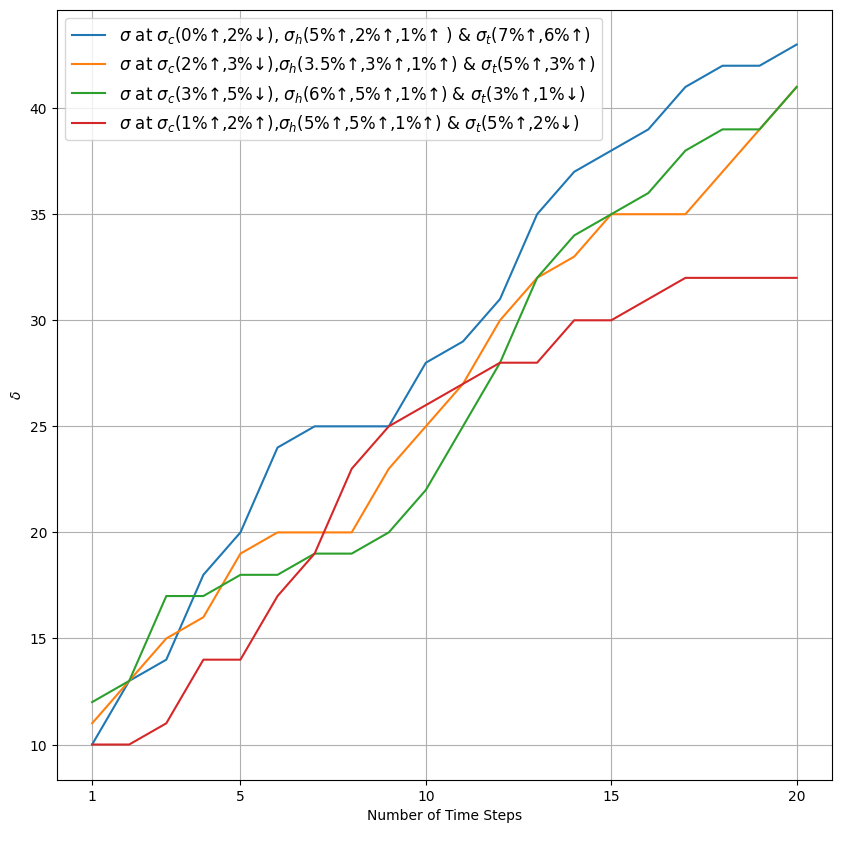

In [20]:
timestep=np.arange(20)
plt.figure(figsize=(10,10))
plt.plot(timestep+1, results_1[0], 
         label='$\sigma$ at $\sigma_c$(0%$\u2191$,2%$\u2193$), $\sigma_h$(5%$\u2191$,2%$\u2191$,1%$\u2191$ ) & $\sigma_t$(7%$\u2191$,6%$\u2191$)')
plt.plot(timestep+1, results_1[1], 
         label='$\sigma$ at $\sigma_c$(2%$\u2191$,3%$\u2193$),$\sigma_h$(3.5%$\u2191$,3%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,3%$\u2191$)')
plt.plot(timestep+1, results_1[2], 
         label='$\sigma$ at $\sigma_c$(3%$\u2191$,5%$\u2193$), $\sigma_h$(6%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(3%$\u2191$,1%$\u2193$)')
plt.plot(timestep+1, results_1[3], 
         label='$\sigma$ at $\sigma_c$(1%$\u2191$,2%$\u2191$),$\sigma_h$(5%$\u2191$,5%$\u2191$,1%$\u2191$) & $\sigma_t$(5%$\u2191$,2%$\u2193$)')
plt.xlabel('Number of Time Steps\n')
plt.ylabel('$\delta$')
plt.xticks([1, 5, 10,15,20])

font_props = fm.FontProperties(size=12)  
plt.legend(prop=font_props)
plt.grid(True)
plt.show()